In [35]:
import pandas as pd     
import numpy as np      
import csv
import re
from nltk.corpus import stopwords 
from nltk.util import ngrams 
from collections import Counter

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("C:/Users/ASUS/Desktop/Untitled Folder 2/yt_data_cleaned.csv")

In [38]:
titles= pd.DataFrame(df, columns = ['Video Title'])
titles=titles.dropna()
print(titles)

                                             Video Title
0              DATA ANALYST PORTFOLIO | 10 PROJECT IDEAS
1      You can't blame Randy Orton for vibing to The ...
2                WWE SummerSlam 2022 Was Unbelievable...
3      Royal Rumble 2023 Was Absolutely Heartbreaking...
4                            Usos Are DONE💔 #wwe #shorts
...                                                  ...
36247  Chinese diver He Zi gets marriage proposal aft...
36248  Venom 2 Let There Be Carnage Trailer 2 🔴LIVE B...
36249  VENOM: LET THERE BE CARNAGE TRAILER #2 - REACT...
36250  VENOM: LET THERE BE CARNAGE - Official Trailer...
36251  VENOM: LET THERE BE CARNAGE - Official Trailer...

[36252 rows x 1 columns]


### Cleaning the titles

In [39]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 
#remove user, https, and RT
titles['clean_titles'] = np.vectorize(remove_pattern)(titles['Video Title'], "https|RT|@[\w]*")
#remove punctuations
titles['clean_titles'] = titles['clean_titles'].str.replace("[^a-zA-Z#]", " ")
#lowering string
titles['clean_titles'] = titles['clean_titles'].str.lower()
#remove stop words
stop_words = set(stopwords.words('english')) 
    
titles['clean_titles'] = [' '.join([w for w in x.lower().split() if w not in stop_words]) 
    for x in titles['clean_titles'].tolist()]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8852\602385964.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  titles['clean_titles'] = titles['clean_titles'].str.replace("[^a-zA-Z#]", " ")


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ASUS\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [40]:
titles.head()

,Video Title,clean_titles
0,DATA ANALYST PORTFOLIO | 10 PROJECT IDEAS,data analyst pofolio project ideas
1,You can't blame Randy Orton for vibing to The ...,you can t blame randy orton for vibing to the ...
2,WWE SummerSlam 2022 Was Unbelievable...,wwe summerslam was unbelievable
3,Royal Rumble 2023 Was Absolutely Heartbreaking...,royal rumble was absolutely heartbreaking
4,Usos Are DONE💔 #wwe #shorts,usos are done #wwe #shorts


In [70]:
#remove wordes with length less than 2
titles['clean_titles'] = titles['clean_titles'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
#tokenization
tokenized_title = titles['clean_titles'].apply(lambda x: list(ngrams(x.split(), 3)))

In [71]:
titles.head()

,Video Title,clean_titles
0,DATA ANALYST PORTFOLIO | 10 PROJECT IDEAS,data analyst pofolio project ideas
1,You can't blame Randy Orton for vibing to The ...,you can blame randy orton for vibing the new d...
2,WWE SummerSlam 2022 Was Unbelievable...,wwe summerslam was unbelievable
3,Royal Rumble 2023 Was Absolutely Heartbreaking...,royal rumble was absolutely heartbreaking
4,Usos Are DONE💔 #wwe #shorts,usos are done #wwe #shorts


In [72]:
print(tokenized_title)

0        [(data, analyst, pofolio), (analyst, pofolio, ...
1        [(you, can, blame), (can, blame, randy), (blam...
2        [(wwe, summerslam, was), (summerslam, was, unb...
3        [(royal, rumble, was), (rumble, was, absolutel...
4        [(usos, are, done), (are, done, #wwe), (done, ...
                               ...                        
36247    [(chinese, diver, gets), (diver, gets, marriag...
36248    [(venom, let, there), (let, there, carnage), (...
36249    [(venom, let, there), (let, there, carnage), (...
36250    [(venom, let, there), (let, there, carnage), (...
36251    [(venom, let, there), (let, there, carnage), (...
Name: clean_titles, Length: 36252, dtype: object


In [73]:
from functools import reduce
l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_title))
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()
df = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df['Phrase']= df['Phrase'].apply(lambda x: ' '.join([w for w in x]))

In [74]:
df.head(10)

,Phrase,Count
0,spider man way,203
1,man way home,203
2,die for you,152
3,save your tears,138
4,slowed reverb bollywood,109
5,saware slowed reverb,104
6,reverb bollywood sad,104
7,bollywood sad song,104
8,sad song arjit,104
9,song arjit singh,104


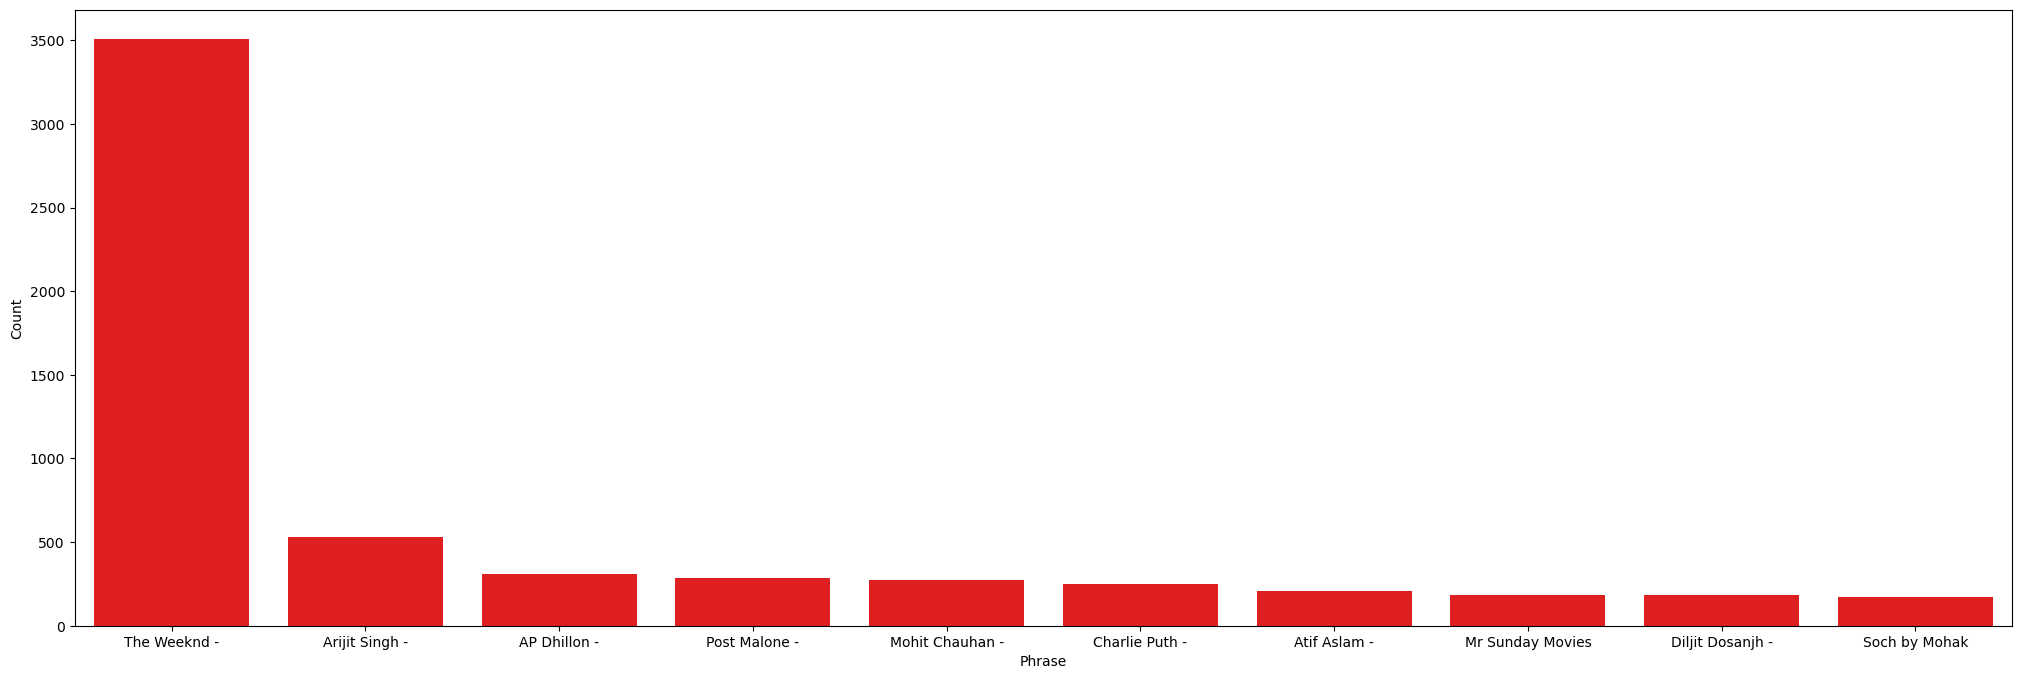

In [131]:
df = df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(25,8))
ax = sns.barplot(data=df, x= "Phrase", y = "Count",color='red')
ax.set(ylabel = 'Count')
plt.show()

## most watched channels

In [78]:
df=pd.read_csv("C:/Users/ASUS/Desktop/Untitled Folder 2/yt_data_cleaned.csv")
channel= pd.DataFrame(df, columns = ['Channel'])
channel=channel.dropna()
print(channel)

                           Channel
0                     Data With Mo
1                              WWE
2                     TheGreatOne!
3                     TheGreatOne!
4                         OnlyMain
...                            ...
36247                     Olympics
36248                 FilmoPedia72
36249                 Reel Rejects
36250                Tyrone Magnus
36251  Sony Pictures Entertainment

[36250 rows x 1 columns]


In [142]:
#removing 'Topic'
channel['clean_channel'] = channel['Channel'].str.replace("Topic", " ")

In [143]:
#tokenization
tokenized_channel = channel['clean_channel'].apply(lambda x: list(ngrams(x.split(), 3)))

In [144]:
print(tokenized_channel)

0                       [(Data, With, Mo)]
1                                       []
2                                       []
3                                       []
4                                       []
                       ...                
36247                                   []
36248                                   []
36249                                   []
36250                                   []
36251    [(Sony, Pictures, Entertainment)]
Name: clean_channel, Length: 36250, dtype: object


In [145]:
l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_channel))
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()
df = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df['Phrase']= df['Phrase'].apply(lambda x: ' '.join([w for w in x]))

In [146]:
df.head(10)

,Phrase,Count
0,The Weeknd -,3508
1,Arijit Singh -,530
2,AP Dhillon -,312
3,Post Malone -,285
4,Mohit Chauhan -,276
5,Charlie Puth -,252
6,Atif Aslam -,209
7,Mr Sunday Movies,183
8,Diljit Dosanjh -,181
9,Soch by Mohak,170


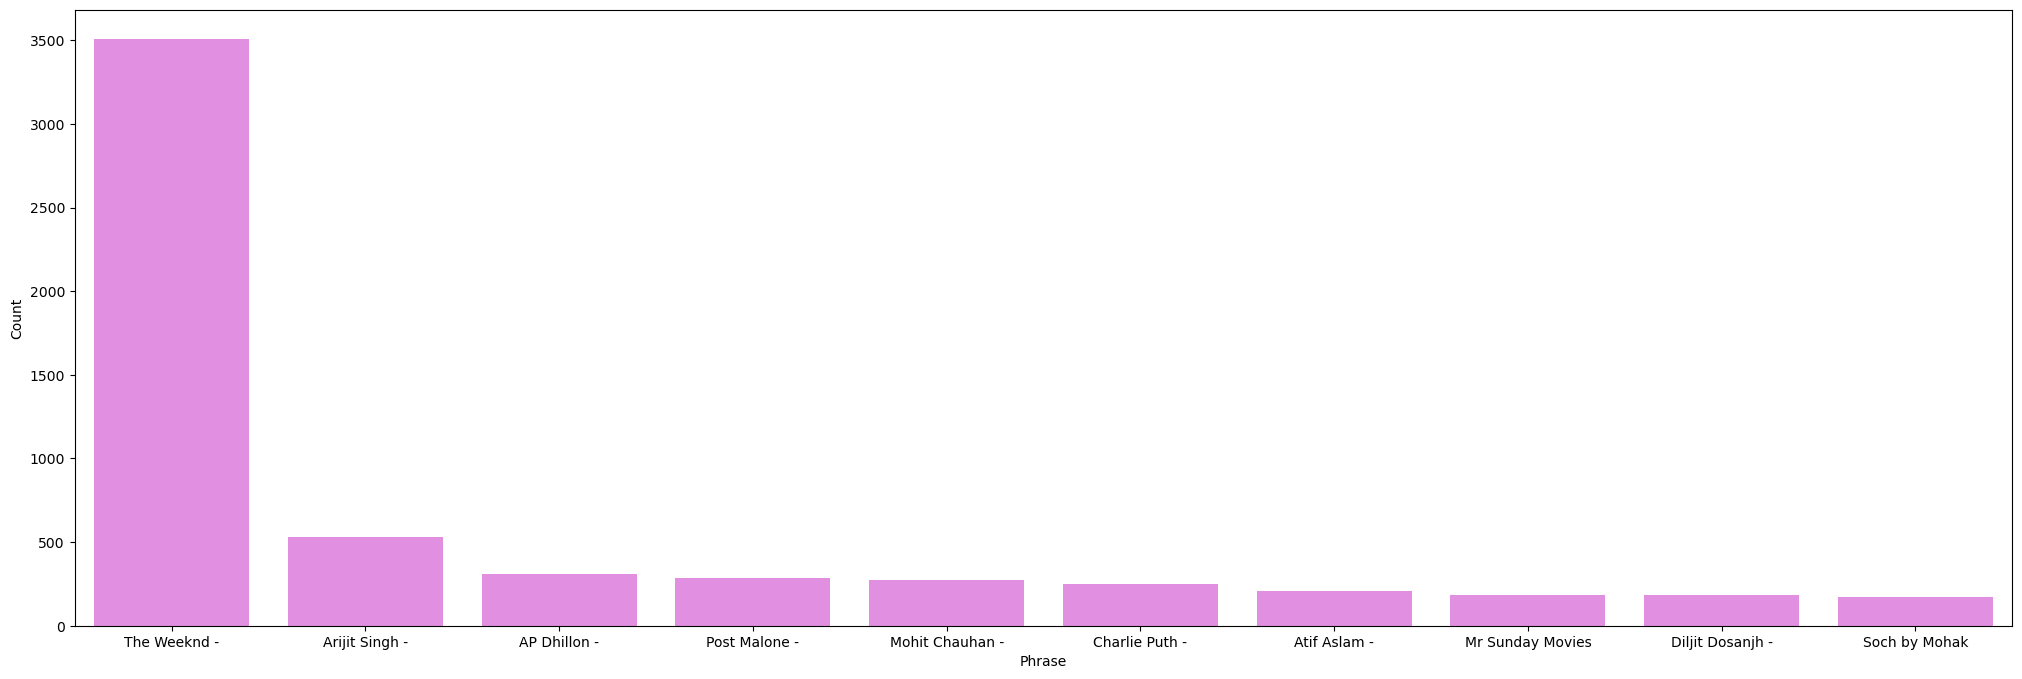

In [147]:
df = df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(25,8))
ax = sns.barplot(data=df, x= "Phrase", y = "Count",color='violet')
ax.set(ylabel = 'Count')
plt.show()